In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import missingno as msno

In [3]:
dataset = pd.read_csv('Dataset/loan_approval_dataset.csv')

In [4]:
dataset.head(5)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


<Axes: >

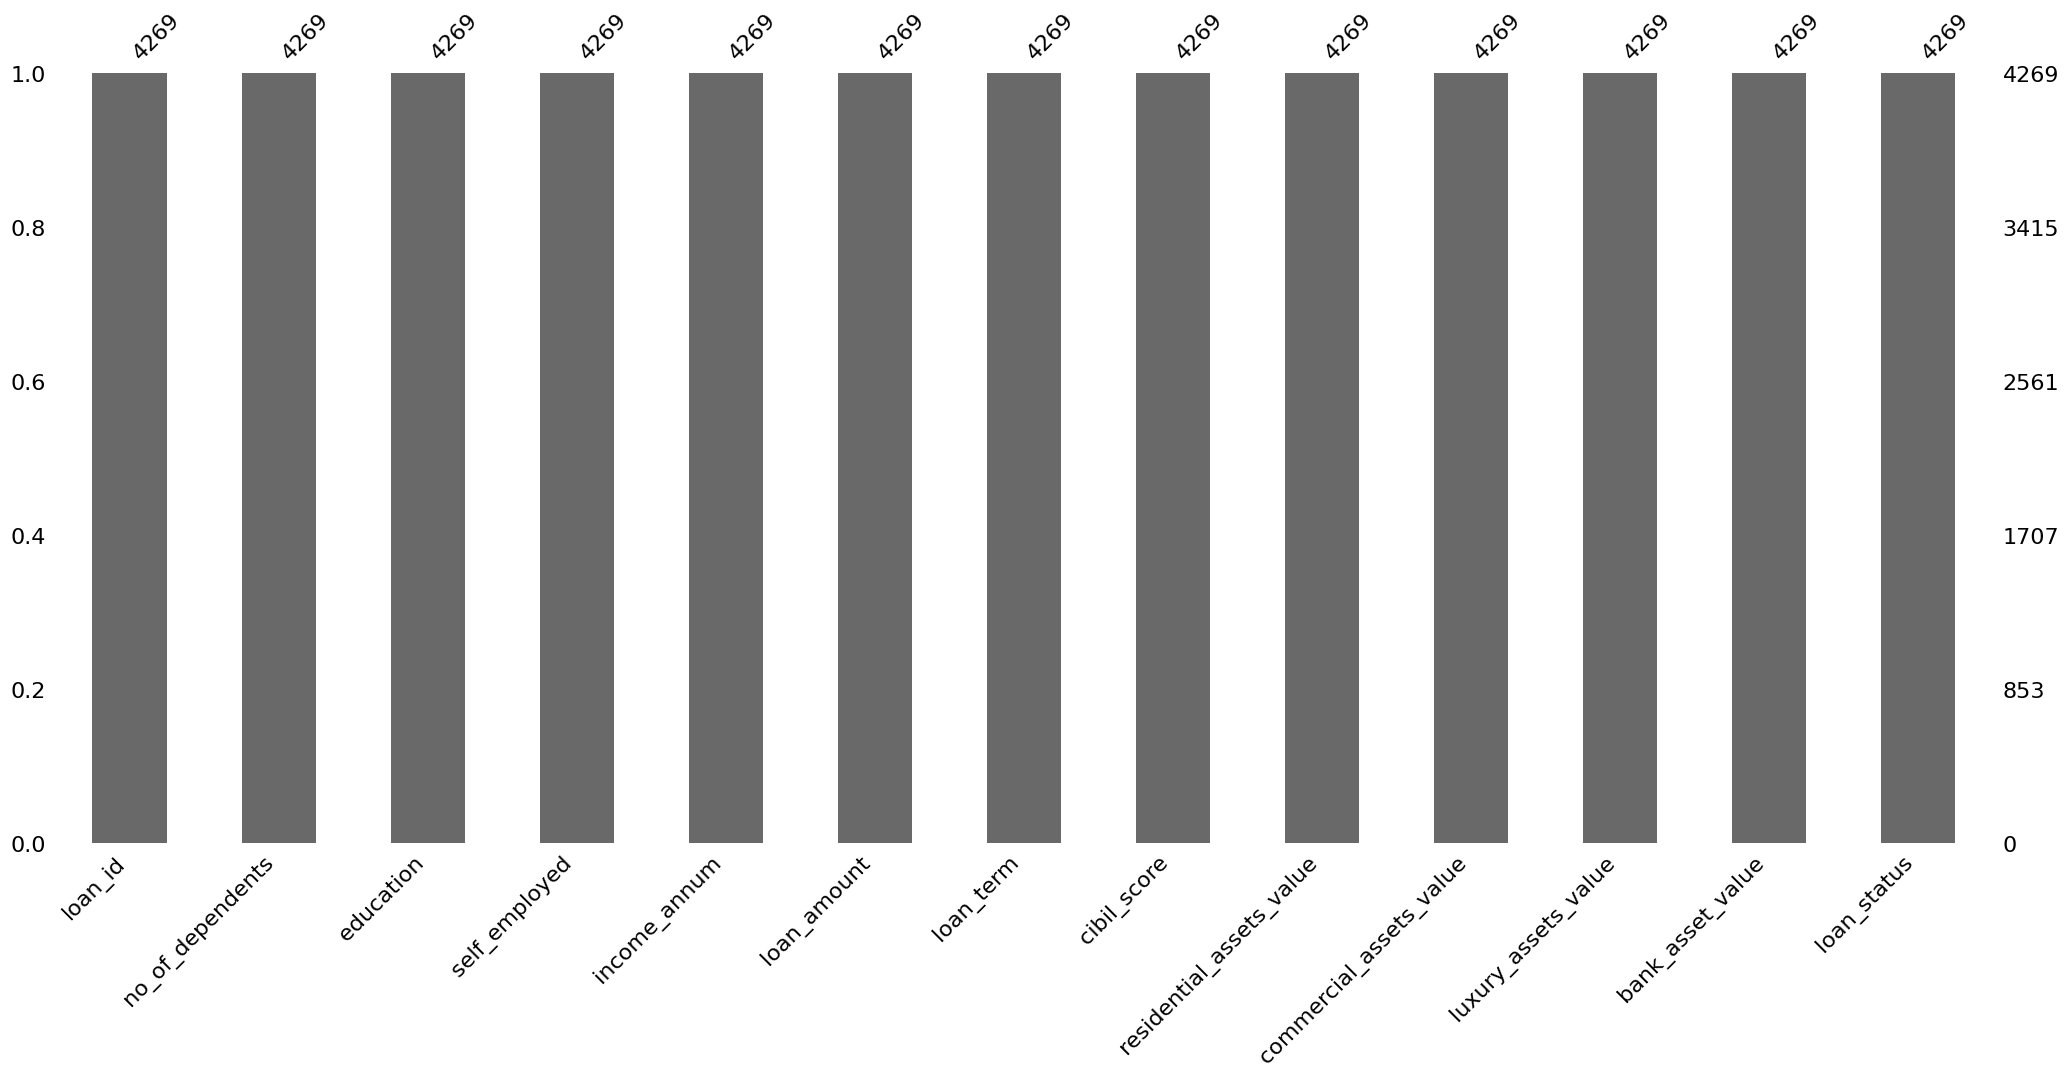

In [6]:
msno.bar(dataset)

**OBSERVATION:** We can see above there is no null values or missing values in the dataset. To confirm we can check with "isna" method.

In [7]:
dataset.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

**OBSERVATION:** Now it is confirmed that there is no null or missing values in the dataset.

In [8]:
dataset.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


## **Feature Engineering & Exploratory Data Analysis**

For feature engineering, we will traverse each parameter/column and prepare it for modelling (if required).<br> But first we will check the categorical and numerical columns in our dataset.

In [9]:
categorical_cols=dataset.select_dtypes(include=['object']).columns
numerical_cols = dataset.select_dtypes(include=np.number).columns.tolist()
print("Categorical Columns in the dataset:")
print(categorical_cols)
print("Numerical Columns in the dataset:")
print(numerical_cols)

Categorical Columns in the dataset:
Index([' education', ' self_employed', ' loan_status'], dtype='object')
Numerical Columns in the dataset:
['loan_id', ' no_of_dependents', ' income_annum', ' loan_amount', ' loan_term', ' cibil_score', ' residential_assets_value', ' commercial_assets_value', ' luxury_assets_value', ' bank_asset_value']


### **Loan ID**

This column won't add any value to our model and to the predictions, so we'll simply drop it from our dataset

In [10]:
dataset =dataset.drop('loan_id', axis = 1)

### **No of Dependents**

In [11]:
dataset[' no_of_dependents'].unique()

array([2, 0, 3, 5, 4, 1])

In [12]:
def pie_chart_config(chart_name, len_values='', color_map=''):
  pc_config = dict(
      fontsize   = 6,
      figsize    = (60,5),
      autopct    = '%1.1f%%'
    )
  pc_config['title'] = chart_name
  if color_map:
    pc_config['colormap'] = color_map
  if len_values:
    pc_config['explode'] = [0.1]*len_values

  return pc_config


<Axes: title={'center': 'Category Distribution - Number of Dependents'}, ylabel=' no_of_dependents'>

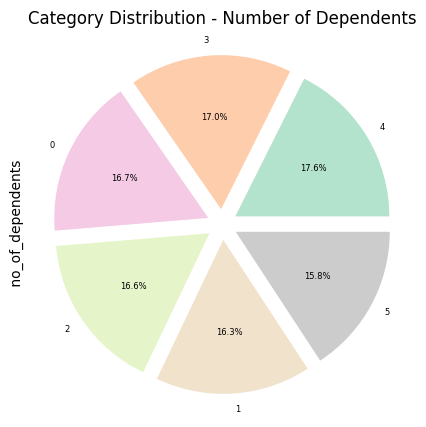

In [13]:
category_config = pie_chart_config('Category Distribution - Number of Dependents', color_map='Pastel2', len_values=6) # category has 17 unique values and we would like to plot all.
dataset[' no_of_dependents'].value_counts().plot.pie(**category_config)

With the above distribution chart, it is clearly depictable that there is equal distribution of each value of no of dependents. But in general, we can say that low dependency of people is decreases the disposable income of the appilcant but its not always true. So, we analyse it further.

<Axes: xlabel=' no_of_dependents', ylabel='count'>

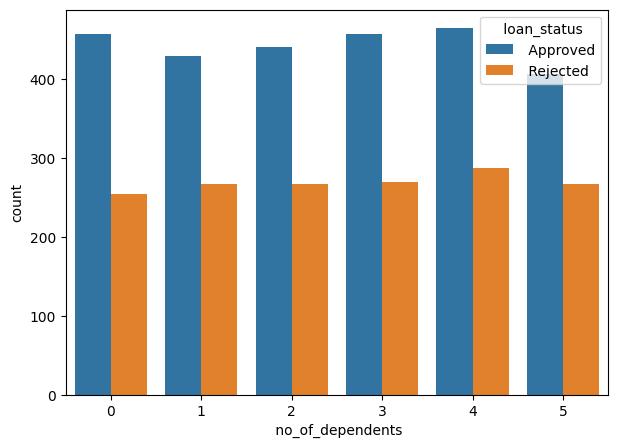

In [14]:
plt.figure(figsize=(7,5))
sns.countplot(x = ' no_of_dependents', data = dataset, hue = ' loan_status')

**OBSERVATION:** The above graph depicts there is slight incremental deviation as number of dependents increase yet there is no significant pattern exist in approval and rejection of loan with increase in number of dependents.

### **EDUCATION**

In [15]:
dataset[' education'].unique()

array([' Graduate', ' Not Graduate'], dtype=object)

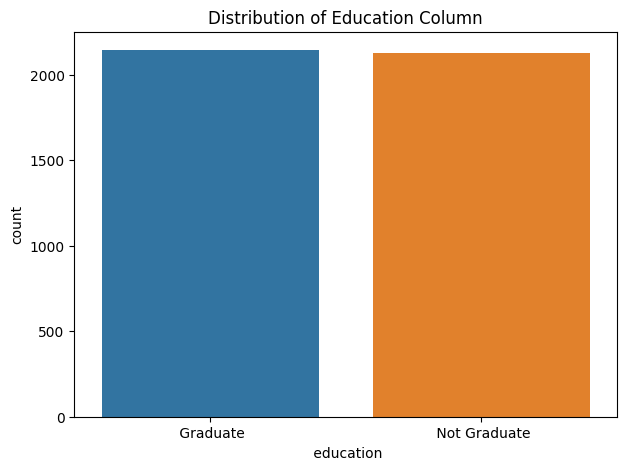

In [16]:
plt.figure(figsize=(7,5))
sns.countplot(dataset,x=' education',orient='h');
plt.title('Distribution of Education Column');

There is almost equal distribution of garduate and not graduate in the dataset. Let analyse it further in correspondance to loan status and check its dependance on it

<Axes: xlabel=' education', ylabel='count'>

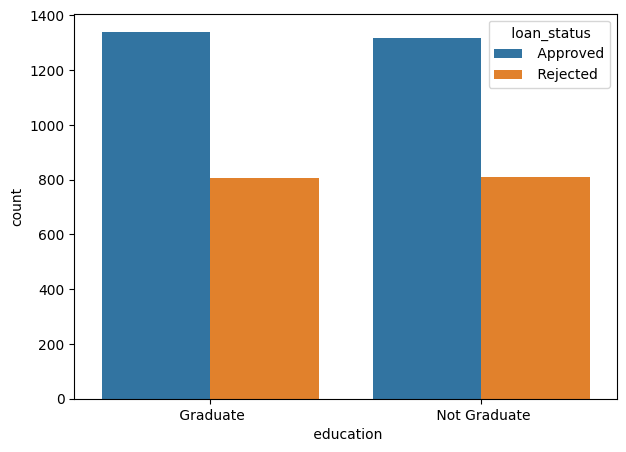

In [17]:
plt.figure(figsize=(7,5))
sns.countplot(x = ' education', data = dataset, hue = ' loan_status')

There is no significant impact of graduate and not graduate on loan appoval status i.e. the difference is very small. Lets further analyse it with self employed and income because these two may provide us better insights on impact of education

<Axes: xlabel=' education', ylabel='count'>

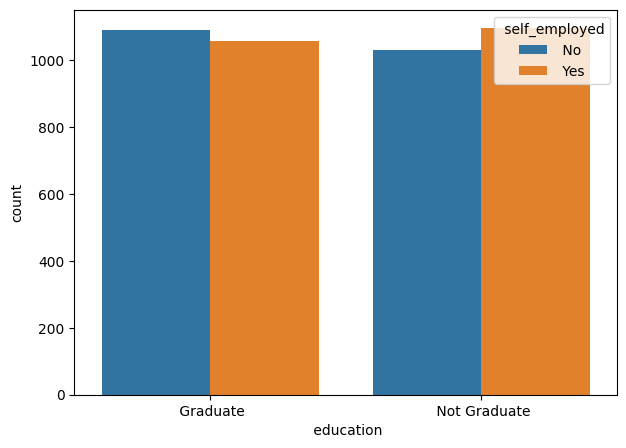

In [18]:
plt.figure(figsize=(7,5))
sns.countplot(x = ' education', data = dataset, hue = ' self_employed')

The above graph depicts the complex relation between the value of education and self employed. The majority of graduates are not self employed i.e. they have stable source of income for repayment in compared to self employed. But we can also consider that the self employed have higher income to counteracting income volatility concerns yet that not always the case. So, we still need to analyse the impact of education

In [19]:
def violin_box_plot(df,col,col2):
    fig ,ax = plt.subplots(1,2,figsize=(12,5))
    ax[0].ticklabel_format(style='plain')
    ax[1].ticklabel_format(style='plain')
    sns.violinplot(df,x=col,y=col2,kde=True,ax=ax[0])
    sns.boxplot(df,x=col,y=col2,ax=ax[1])
    ax[0].set_title(f'Distribution of {col}')
    ax[1].set_title(f'{col} Boxplot')
    fig.show();

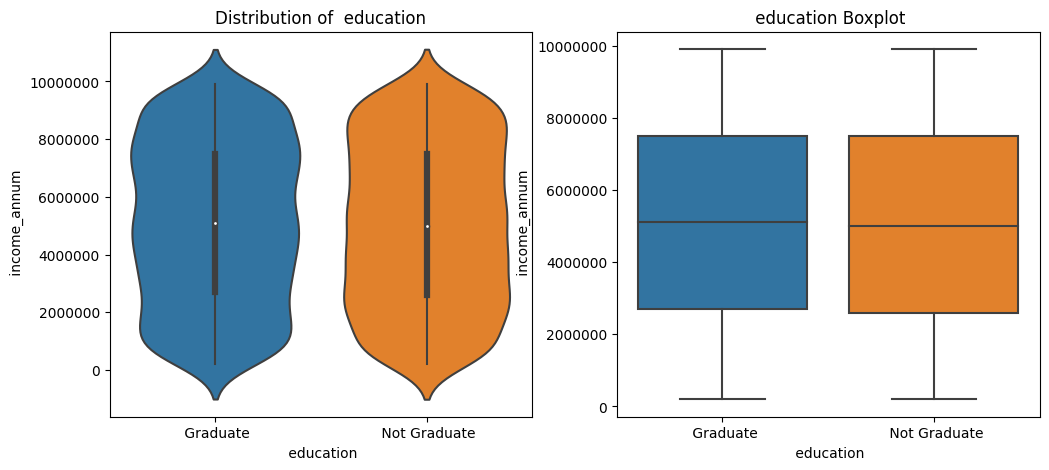

In [20]:
violin_box_plot(dataset,' education', ' income_annum')

The violin plot shows more deviation in distribution of graduate for the income range of 6000000 and 8000000 in comparision of not graduate yet for not graduate the deviation in distribution is even for the income range of 2000000 and 8000000.<br> The box depicts same median range for both categories of education.<br>
**OBERVATION:** With the above graphs we can assume that education don't have major impact on loan approval

### **SELF EMPLOYED**

In [21]:
dataset[' self_employed'].unique()

array([' No', ' Yes'], dtype=object)

<Axes: title={'center': 'Category Distribution - Self Employed'}, ylabel=' self_employed'>

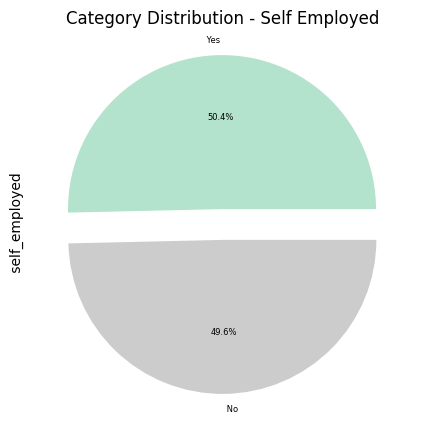

In [22]:
category_config = pie_chart_config('Category Distribution - Self Employed', color_map='Pastel2', len_values=2) # category has 17 unique values and we would like to plot all.
dataset[' self_employed'].value_counts().plot.pie(**category_config)

Similar to Education, there is almost equal distribution of self employment in the dataset. Let analyse it further in correspondance to loan status and check its dependence on it

<Axes: xlabel=' self_employed', ylabel='count'>

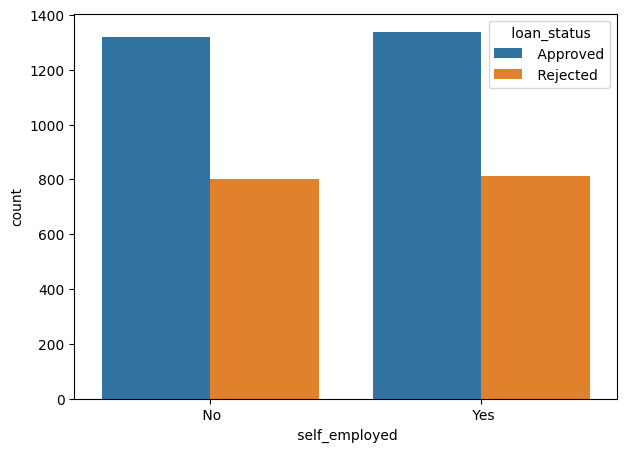

In [23]:
plt.figure(figsize=(7,5))
sns.countplot(x = ' self_employed', data = dataset, hue = ' loan_status')

There is no such major difference with employment on loan status. Lets check it with income_annum, loan_amount and loan_term

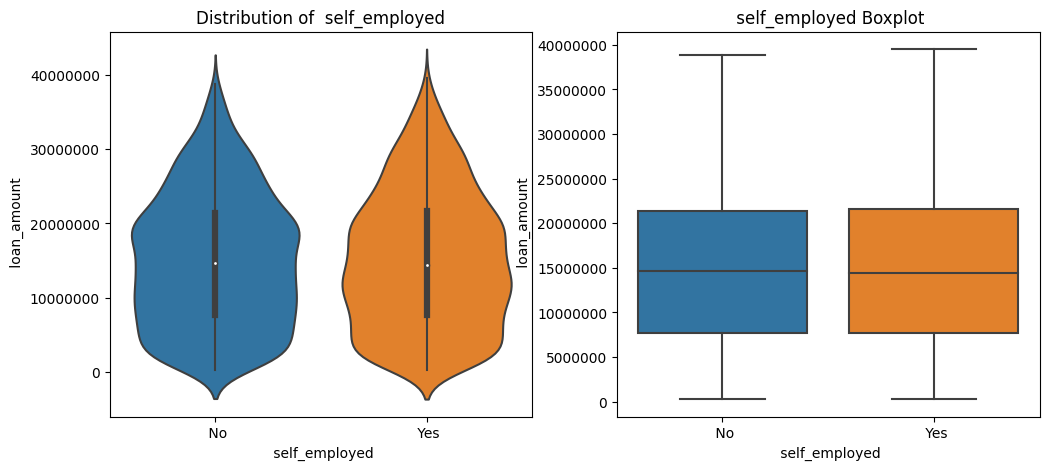

In [24]:
violin_box_plot(dataset,' self_employed', ' loan_amount')

<Axes: xlabel=' self_employed', ylabel='Count'>

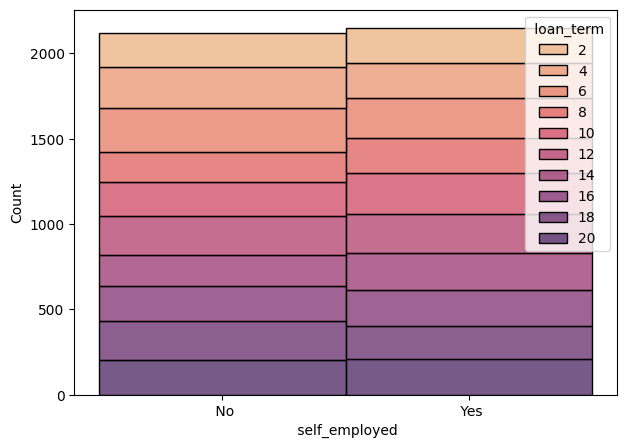

In [25]:
plt.figure(figsize=(7,5))
sns.histplot(x  = ' self_employed', data = dataset,hue = ' loan_term', multiple='stack',palette="flare")

# As rest of our data columns are numerical, we will directly perform univariate & bivariate analysis to gather insights.

### **Annual Income**

In [26]:
def hist_box_plot(df,col):
    fig ,ax = plt.subplots(1,2,figsize=(16,4))
    ax[0].ticklabel_format(style='plain')
    ax[1].ticklabel_format(style='plain')
    sns.histplot(df,x=col,kde=True,ax=ax[0], color = 'green')
    sns.boxplot(df,x=col,ax=ax[1])
    ax[0].set_title(f'Distribution of {col}')
    ax[1].set_title(f'{col} Boxplot')
    fig.show();

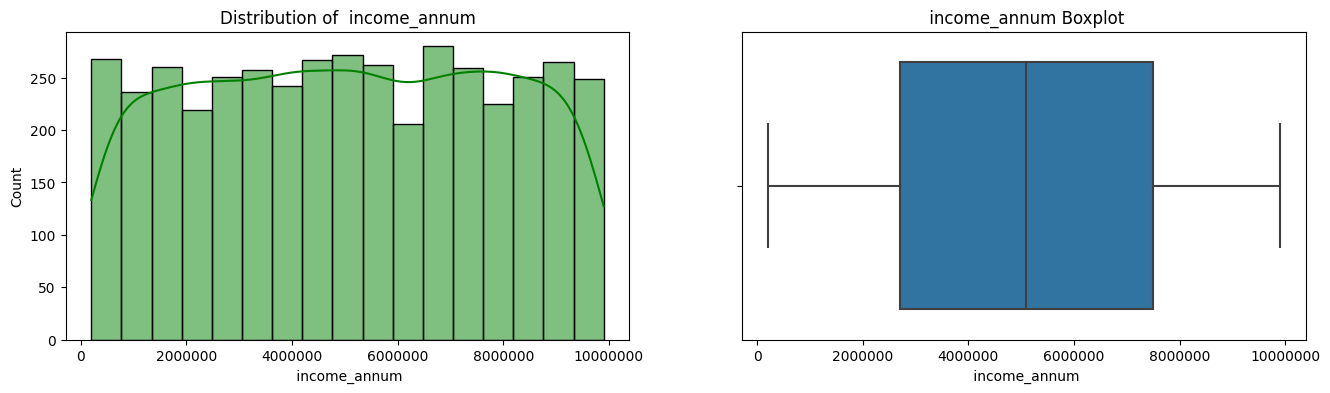

In [27]:
hist_box_plot(dataset,' income_annum')

In [28]:
import plotly.express as px
aggregate_plot = dataset.groupby(' loan_status')[' income_annum'].sum().sort_values(ascending=False)
fig = px.bar(aggregate_plot , color = aggregate_plot.index , width=700 , height =500,title='Annual Income vs Loan Status')
fig.show()

**Observation:** Higher the annual income of an applicant, higher are the chances of loan approval

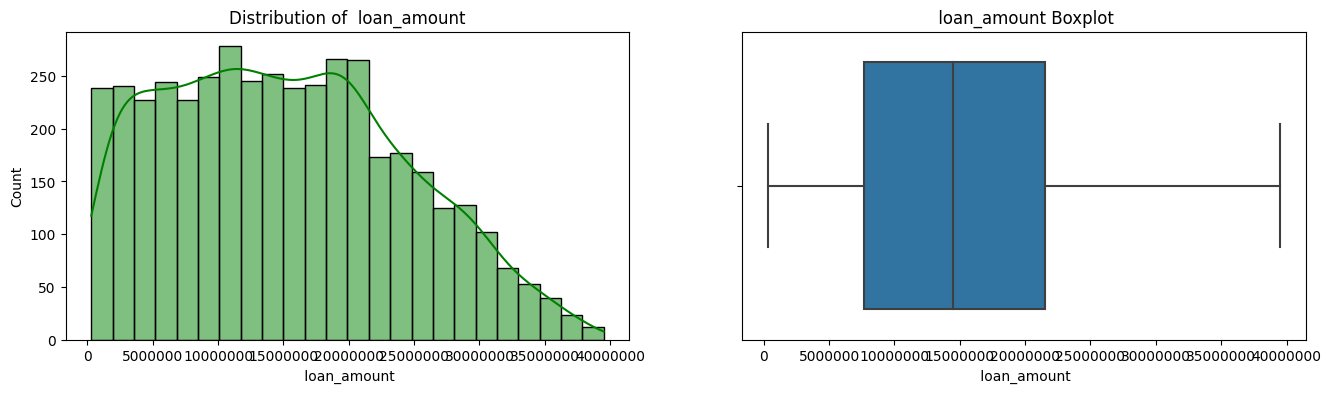

In [29]:
hist_box_plot(dataset,' loan_amount')

Text(0.5, 1.0, 'Loan Amount vs. Loan Term')

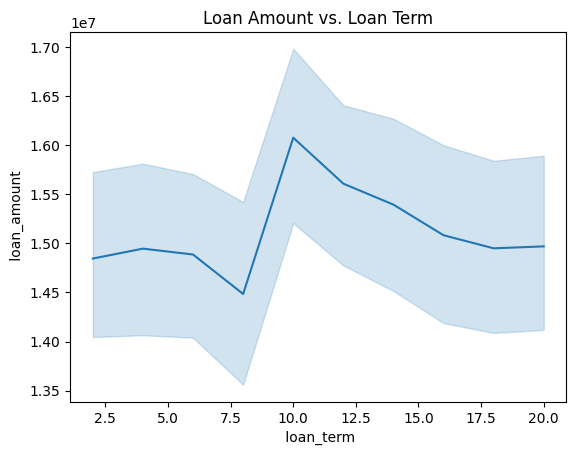

In [30]:
sns.lineplot(x = ' loan_term', y = ' loan_amount', data = dataset).set_title('Loan Amount vs. Loan Term')

The loan amount is significantly higher for the loan tenure of 10 years. However, for the loan tenure of 2.5 - 7.5years the loan amount is between 1400000 - 15500000.

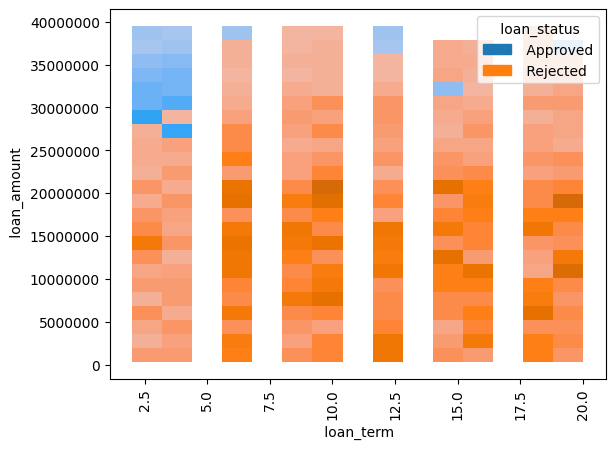

In [31]:
ax = sns.histplot(data = dataset, x = ' loan_term', y = ' loan_amount', hue=' loan_status')
ax.ticklabel_format(style='plain', axis="y")
plt.xticks(rotation=90)
plt.show()

The loans that are rejected are mainly for lower amounts and longer repayment periods. On the other hand, the loans that are accepted often have higher amounts and shorter repayment times.

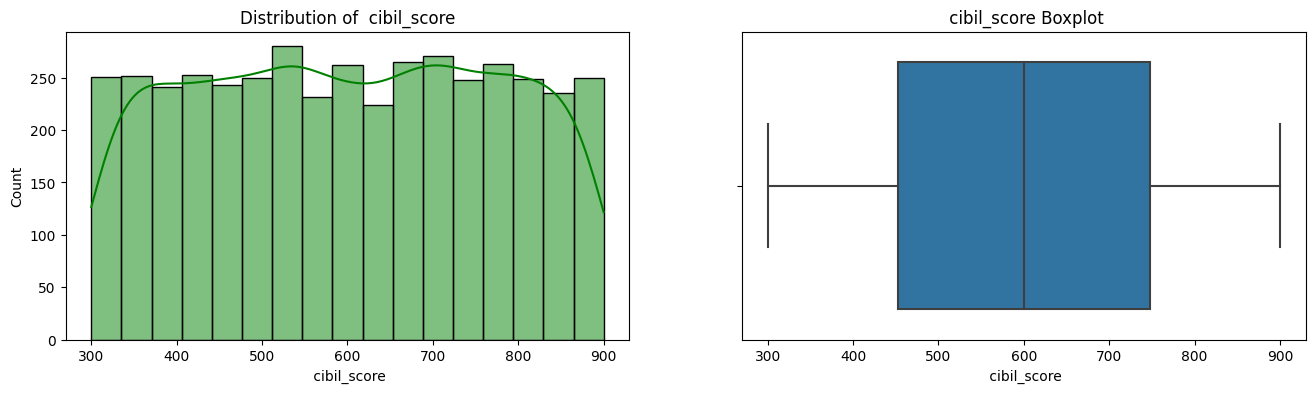

In [32]:
hist_box_plot(dataset,' cibil_score')

<Axes: xlabel=' loan_status', ylabel=' cibil_score'>

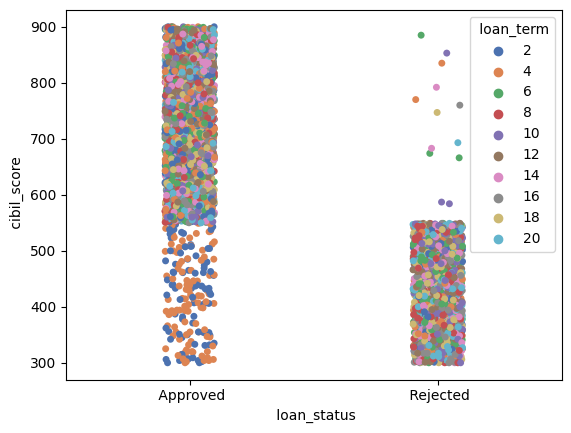

In [33]:
sns.stripplot(data=dataset, x=" loan_status", y=" cibil_score", hue=" loan_term", palette="deep")

**Observation:** With above plot, we can see valuable insights in our data: <br>
1. Majority of applicants with cibil score less that 550 have rejection as loan status. <br>
2. Loan approved for applicants with cibil less than 550, have loan tenure of 2 or 4 years only.
3. There are also few cases, where applicants have high cibil score and long loan tenure but still have rejected loan status.

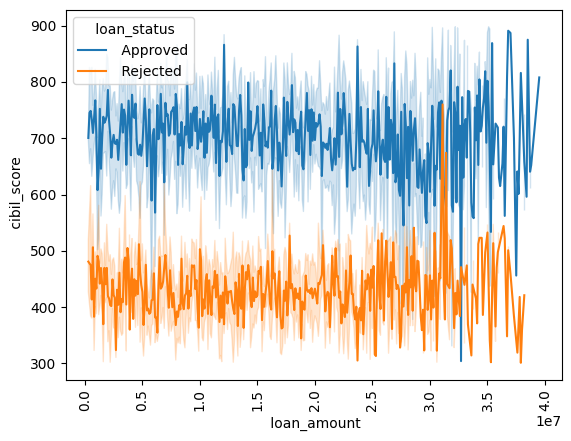

In [34]:
ax = sns.lineplot(data = dataset, y = ' cibil_score', x = ' loan_amount', hue =' loan_status')
ax.ticklabel_format(style='plain', axis="y")
plt.xticks(rotation=90)
plt.show()

**Observation:** Irrespective of loan amount, if the applicant has low cibil score, the loan will get rejected by the bank.

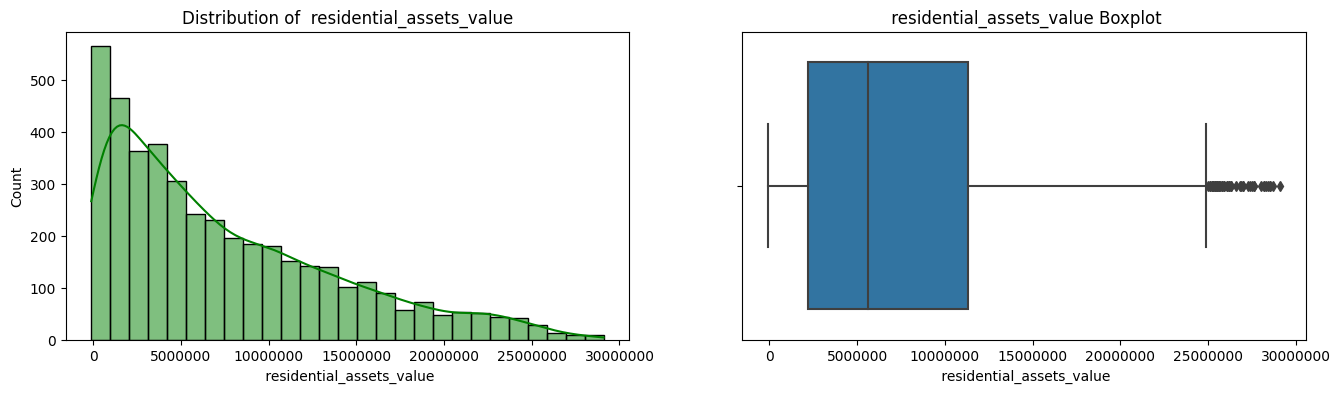

In [35]:
hist_box_plot(dataset,' residential_assets_value')

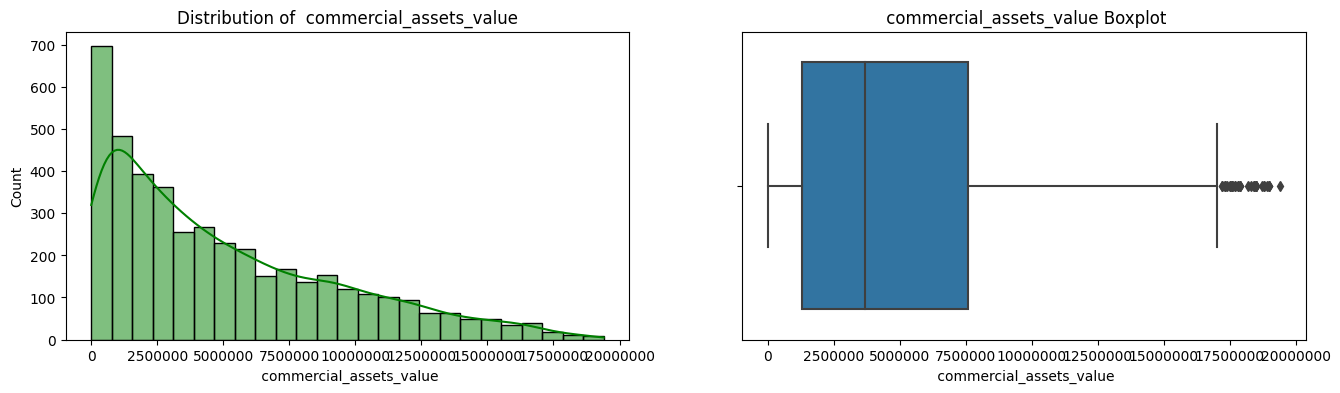

In [36]:
hist_box_plot(dataset,' commercial_assets_value')

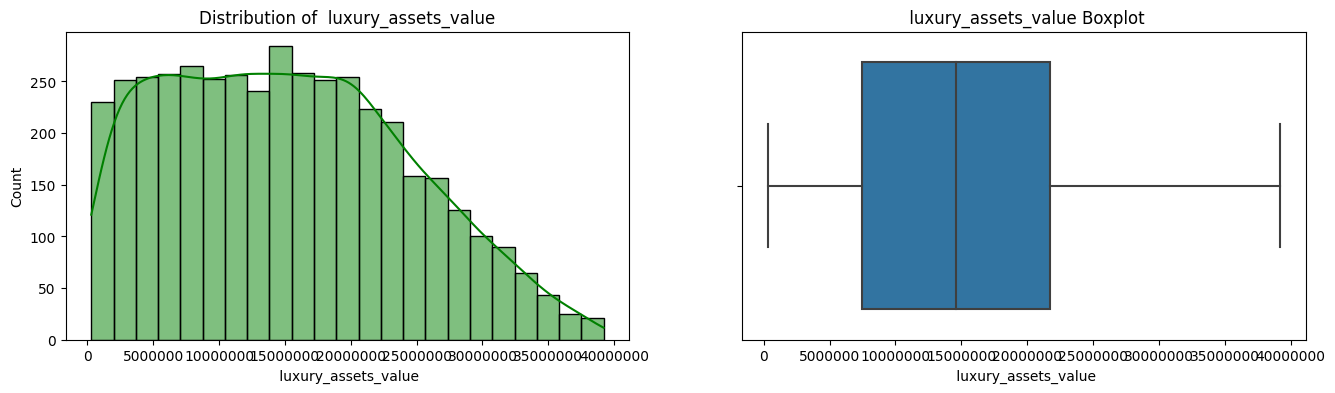

In [37]:
hist_box_plot(dataset,' luxury_assets_value')

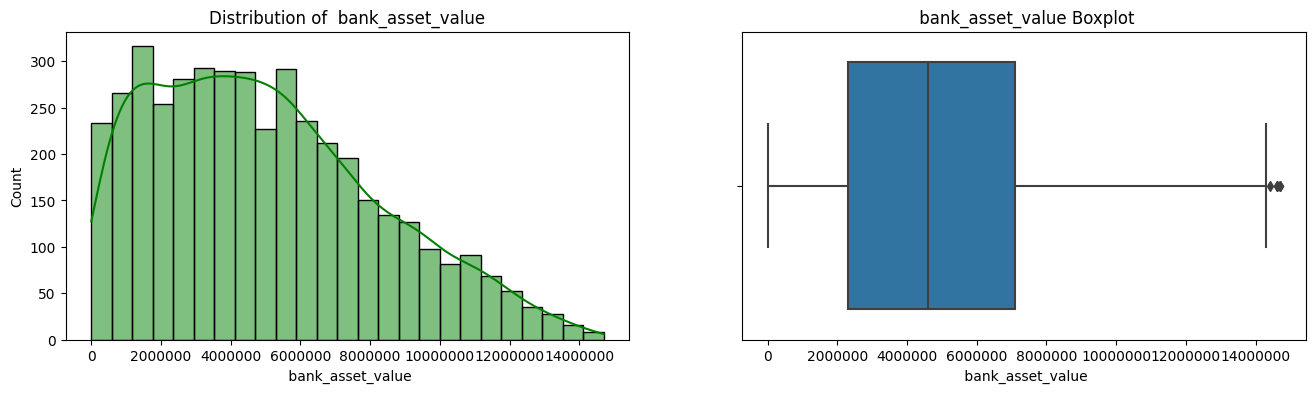

In [38]:
hist_box_plot(dataset,' bank_asset_value')

<Axes: xlabel=' residential_assets_value', ylabel='Count'>

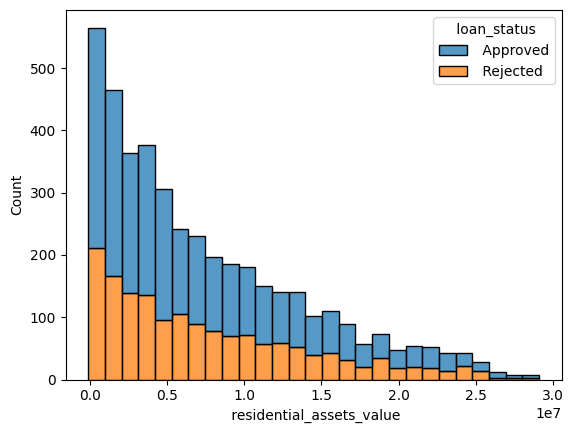

In [39]:
sns.histplot(x  = ' residential_assets_value', data = dataset, hue = ' loan_status', multiple='stack')

<Axes: xlabel=' commercial_assets_value', ylabel='Count'>

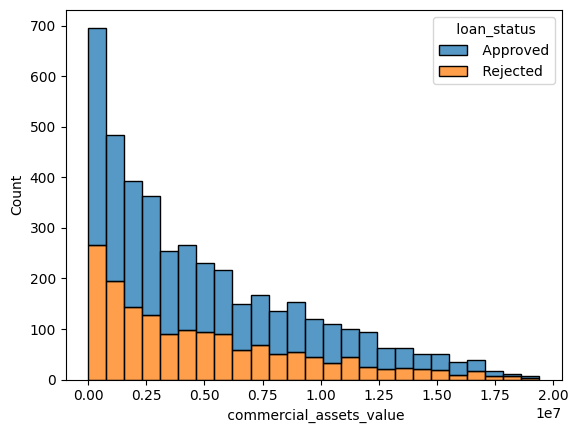

In [40]:
sns.histplot(x  = ' commercial_assets_value', data = dataset, hue = ' loan_status', multiple='stack')

<Axes: xlabel=' luxury_assets_value', ylabel='Count'>

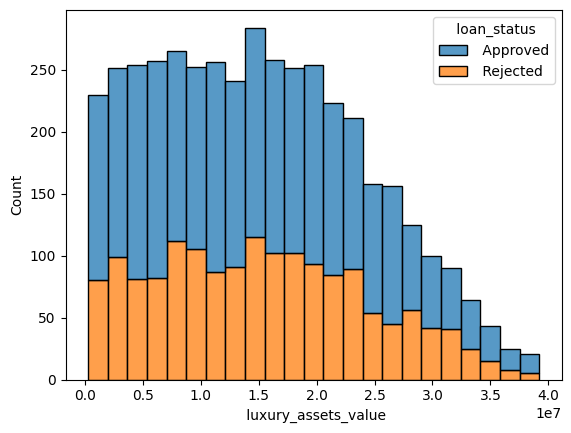

In [41]:
sns.histplot(x  = ' luxury_assets_value', data = dataset, hue = ' loan_status', multiple='stack')

<Axes: xlabel=' bank_asset_value', ylabel='Count'>

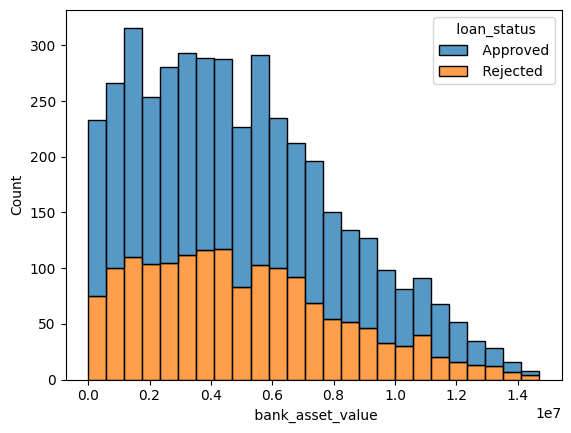

In [42]:
sns.histplot(x  = ' bank_asset_value', data = dataset, hue = ' loan_status', multiple='stack')

**Observation:** The above graphs clearly depicts that there are more luxury and bank assests combine in compare to residential and commercial assets combine. The realtion between all the assets an applicant have has impact on loan approval. As assets of an applicant increases the channces of loan approval are also increases.

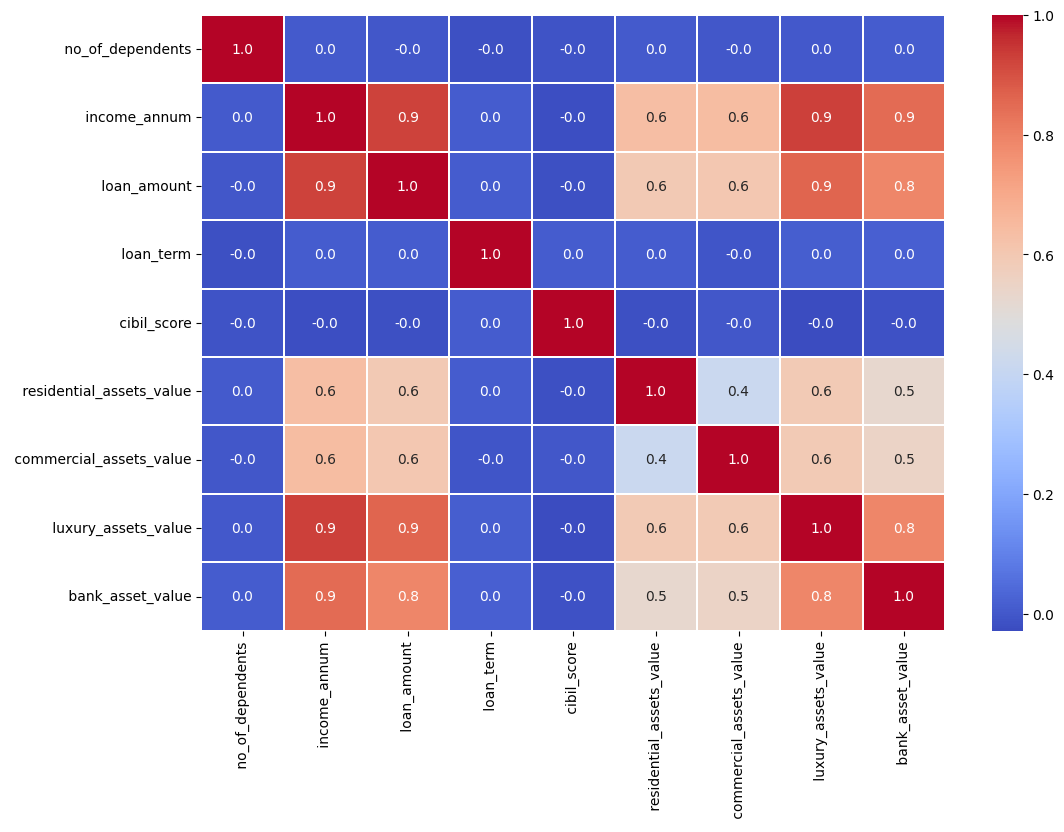

In [43]:
plt.figure(figsize=(12,8))
sns.heatmap(dataset.corr(), cmap='coolwarm', annot=True, fmt='.1f', linewidths=.1)
plt.show()

### **DATA PREPROCESSING & MODELING**

As we are done with our analysis and relation between different columns. Next, we will convert our categorical variables into numerical one and perform modeling

In [44]:
Education_dum = pd.get_dummies(dataset[" education"])
dataset =pd.concat([dataset,Education_dum],axis=1)
dataset.drop(" education",axis=1,inplace=True)

Self_Employed_dum = pd.get_dummies(dataset[" self_employed"])
dataset =pd.concat([dataset,Self_Employed_dum],axis=1)
dataset.drop(" self_employed",axis=1,inplace=True)

dataset[' loan_status'] = dataset[' loan_status'].map({' Rejected':0, ' Approved':1})

In [45]:
dataset.head(5)

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,Graduate,Not Graduate,No,Yes
0,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1,1,0,1,0
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0,0,1,0,1
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0,1,0,1,0
3,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0,1,0,1,0
4,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0,0,1,0,1


# Importing required ML libraries

In [50]:
#pip install catboost
from sklearn import preprocessing
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost.sklearn import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score

In [51]:
def Models(models):

    model = models
    X = dataset.drop(columns=[' loan_status']).values
    y = dataset[' loan_status'].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 25)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    y_total = model.predict(X)

    print("\t\tError Table")
    print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('Accuracy on Traing set   : ', model.score(X_train,y_train))
    print('Accuracy on Testing set  : ', model.score(X_test,y_test))
    return y_total, y

def cm_plot(actual, predicted):
  confusion_matrix = metrics.confusion_matrix(actual, predicted)
  cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

  cm_display.plot()
  plt.show()


In [52]:
X = dataset.drop(columns=[' loan_status']).values
y = dataset[' loan_status'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 25)

classifiers = [['DecisionTreeClassifier',DecisionTreeClassifier()],
              ['XGBClassifier', XGBClassifier()],
              ['RandomForestClassifier', RandomForestClassifier()],
              ['MLPClassifier',MLPClassifier()],
              ['AdaBoostClassifier',AdaBoostClassifier()],
              ['ExtraTreesClassifier',ExtraTreesClassifier()],
              ['GradientBoostingClassifier',GradientBoostingClassifier()],
              ['KNeighborsClassifier',KNeighborsClassifier()]]
Acc = pd.DataFrame(index=None, columns=['model','Root Mean Squared  Error','Accuracy on Traing set','Accuracy on Testing set'])
for mod in classifiers:
    name = mod[0]
    model = mod[1]
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)

    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    ATrS =  model.score(X_train,y_train)*100
    ATeS = model.score(X_test,y_test)*100
    Acc = Acc.append(pd.Series({'model':name, 'Root Mean Squared  Error': RMSE,'Accuracy on Traing set':ATrS,'Accuracy on Testing set':ATeS}),ignore_index=True )

In [53]:
Acc.sort_values(by='Accuracy on Testing set')

,model,Root Mean Squared Error,Accuracy on Traing set,Accuracy on Testing set
3,MLPClassifier,0.763635,39.502196,41.686183
7,KNeighborsClassifier,0.670559,72.445095,55.035129
4,AdaBoostClassifier,0.181071,97.920937,96.721311
5,ExtraTreesClassifier,0.171096,100.000000,97.072600
0,DecisionTreeClassifier,0.149158,100.000000,97.775176
6,GradientBoostingClassifier,0.149158,99.472914,97.775176
1,XGBClassifier,0.141090,100.000000,98.009368
2,RandomForestClassifier,0.141090,100.000000,98.009368


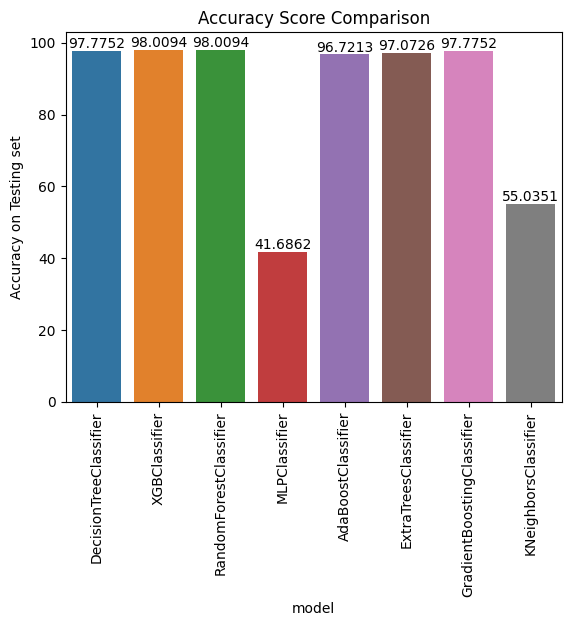

In [54]:
#Comparing all machine learning algorithm accuracy score by using bar plot.
ax = sns.barplot(data= Acc, x="model", y="Accuracy on Testing set")
ax.set_title('Accuracy Score Comparison')
plt.xticks(rotation=90)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '{0:.4f}'.format(p.get_height()),
        fontsize=10, color='black', ha='center', va='bottom')

## **Hyperparameter Tuning**

**We will tune hyper parameters of our best results giving algorithms**

### **Random Forest Classifier**

		Error Table
Mean Absolute Error      :  0.01873536299765808
Mean Squared  Error      :  0.01873536299765808
Root Mean Squared  Error :  0.13687718216583097
Accuracy on Traing set   :  1.0
Accuracy on Testing set  :  0.9812646370023419


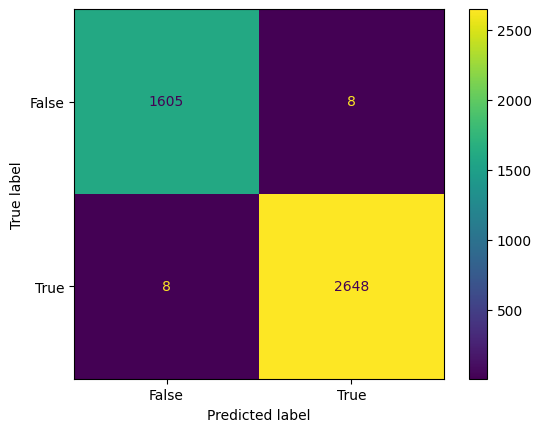

In [55]:
y_predicted_rf, y_actual = Models(RandomForestClassifier(n_estimators=10000,min_samples_split=2,min_samples_leaf=1,max_features='sqrt',max_depth=25))
f1_score_rf = f1_score(y_actual, y_predicted_rf)*100
cm_plot(y_actual, y_predicted_rf)

### **Gradient Boosting Classifier**

		Error Table
Mean Absolute Error      :  0.0234192037470726
Mean Squared  Error      :  0.0234192037470726
Root Mean Squared  Error :  0.15303334194571
Accuracy on Traing set   :  1.0
Accuracy on Testing set  :  0.9765807962529274


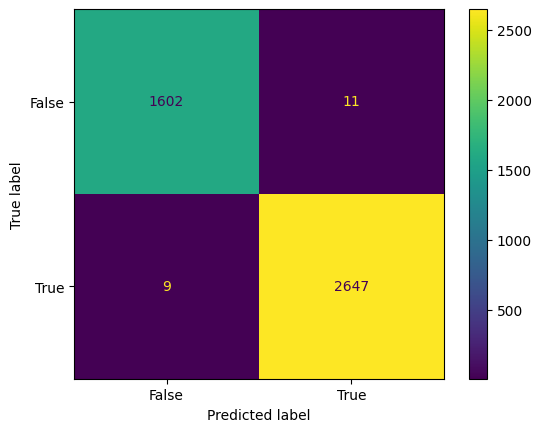

In [56]:
y_predicted_gbc, y_actual = Models(GradientBoostingClassifier(random_state=25, n_estimators=10000, learning_rate=0.02, max_depth=25))
f1_score_gbc = f1_score(y_actual, y_predicted_gbc)*100
cm_plot(y_actual, y_predicted_gbc)

### **XGBoost Classifier**

		Error Table
Mean Absolute Error      :  0.01873536299765808
Mean Squared  Error      :  0.01873536299765808
Root Mean Squared  Error :  0.13687718216583097
Accuracy on Traing set   :  1.0
Accuracy on Testing set  :  0.9812646370023419


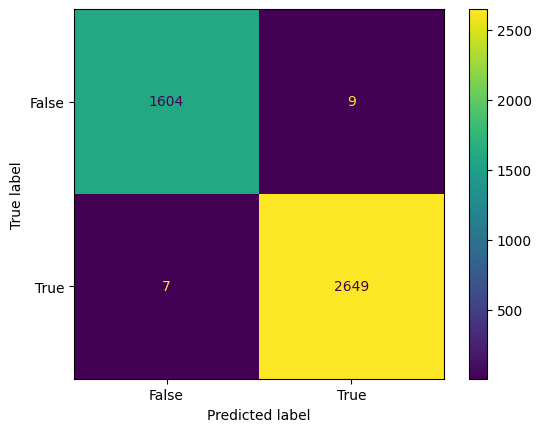

In [57]:
y_predicted_xgbc, y_actual = Models(XGBClassifier(random_state=25, n_estimators=10000, learning_rate=0.02, max_depth=25))
f1_score_xgbc = f1_score(y_actual, y_predicted_xgbc)*100
cm_plot(y_actual, y_predicted_xgbc)

### **CatBoost Classifier**

Streaming output truncated to the last 5000 lines.
5006:	learn: 0.0049086	total: 22.2s	remaining: 22.2s
5007:	learn: 0.0049086	total: 22.2s	remaining: 22.2s
5008:	learn: 0.0049086	total: 22.2s	remaining: 22.1s
5009:	learn: 0.0049086	total: 22.2s	remaining: 22.1s
5010:	learn: 0.0049086	total: 22.2s	remaining: 22.1s
5011:	learn: 0.0049086	total: 22.2s	remaining: 22.1s
5012:	learn: 0.0049086	total: 22.2s	remaining: 22.1s
5013:	learn: 0.0049086	total: 22.2s	remaining: 22.1s
5014:	learn: 0.0049086	total: 22.2s	remaining: 22.1s
5015:	learn: 0.0049086	total: 22.2s	remaining: 22.1s
5016:	learn: 0.0049086	total: 22.3s	remaining: 22.1s
5017:	learn: 0.0049086	total: 22.3s	remaining: 22.1s
5018:	learn: 0.0049086	total: 22.3s	remaining: 22.1s
5019:	learn: 0.0049086	total: 22.3s	remaining: 22.1s
5020:	learn: 0.0049086	total: 22.3s	remaining: 22.1s
5021:	learn: 0.0049086	total: 22.3s	remaining: 22.1s
5022:	learn: 0.0049086	total: 22.3s	remaining: 22.1s
5023:	learn: 0.0049085	total: 22.3s	remaining: 2

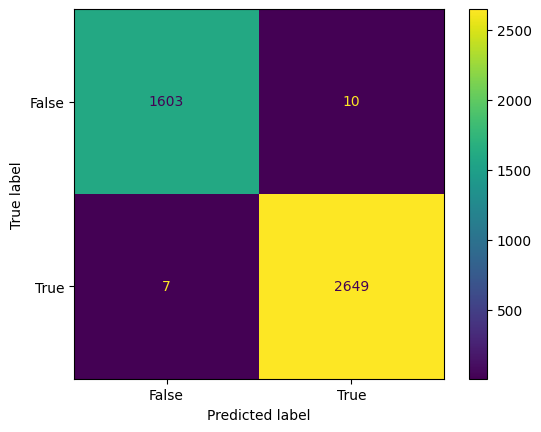

In [58]:
y_predicted_cb, y_actual = Models(CatBoostClassifier(iterations= 10000, learning_rate= 0.02, random_state= 25))
f1_score_cb = f1_score(y_actual, y_predicted_cb)*100
cm_plot(y_actual, y_predicted_cb)

### **Comparing F1 scores**

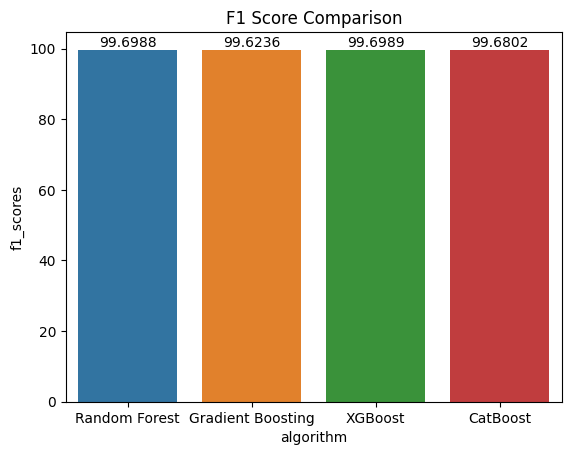

In [59]:
algorithm = ['Random Forest', 'Gradient Boosting', 'XGBoost', 'CatBoost']
f1_scores = [f1_score_rf, f1_score_gbc, f1_score_xgbc, f1_score_cb]
temp_dataset_train = pd.DataFrame()
temp_dataset_train["algorithm"] = algorithm
temp_dataset_train["f1_scores"] = f1_scores
ax = sns.barplot(data= temp_dataset_train, x="algorithm", y="f1_scores")
ax.set_title('F1 Score Comparison')
for i in ax.containers:
  ax.bar_label(i,)


**Conclusion:** With above accuracy score and F1 score charts, we can see the algorithms like Decision Tree, Random forest, XGboost & Catboost are giving us closer results whereras MLP & Knearest Neighbor have very low performance on this dataset. This shows picking up the right model is very important for prediction. However, with silight better performance Random forest and Xgboost giving us maximum F1 score and Accuracy score.